In [26]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
%matplotlib inline

In [27]:
def trl_dvsn(n):
    
    isprime = True
    cnt = 2
    
    while isprime and cnt < n:
        if n%cnt == 0:
            isprime = False
        else:
            cnt += 1
    
    return isprime

**Problem 1** (3pts for each part): As we covered in class, for a given natural number $n\in \mathbb{N}$, we say it is prime if its only divisors are $1$ and itself.  Otherwise, we say the number is composite.  Likewise, we have the _Fundamental Theorem of Arithmetic_, which says that for any $n\in\mathbb{N}$, $n$ has a prime factorization so that 
$$
n = p_{1}^{k_{1}}\cdots p_{j}^{k_{j}}, ~ k_{j}\in \mathbb{N}
$$
where each $p_{l}$ is prime and the decomposition is unique modulo rearranging the order of the terms.  Show

* If $n$ is composite, show there is a prime factor $p_{j}$ such that $p_{j}\leq\sqrt{n}$.
* If $n>6$ and $n$ is prime, show that there is some $k\in\mathbb{N}$ such that $n=6k+1$ or $n=6k+5$.

## **Problem 1**

**If n is composite there is a prime factor $p_j$ such that $p_{j}\leq\sqrt{n}$, because:**
if n is composite there has to be $a\in \mathbb{N}$ and a $b\in \mathbb{N}$ such that $n = a*b$ and $a, b \in \{1,n\}$. Let $a\leq b$ => $a=\sqrt{a^{2}}\leq \sqrt{a*b}=\sqrt{n}$. If $a$ is, in fact, prime, then we have proved the statement.
If $a$ isn't prime, we'll repeat the beginning of the proof. Let there exist an $a_1\in \mathbb{N}$ and $a_2\in \mathbb{N}$ such that $a_1,a_2 \notin \{1,a\}$. We continue these steps until one of the factors is prime. We call this factor $p_{j}$, note that $p_{j}\leq a\leq \sqrt{n}$.

**If $n>6$ and $n$ is prime, show that there is some $k\in\mathbb{N}$ such that $n=6k+1$ or $n=6k+5$, because:**

If $n>6$ and $n$ is prime,there is no $k\in\mathbb{N}$ such that $n=6k+0$ or $n=6k+2$ or $n=6k+3$ or $n=6k+4$.If there was $k\in\mathbb{N}$ such that $n=6k+0$ that would mean that 6 | n and if $n=6k+2$ then 2 | n and if $n=6k+3$ then 3 | n and if $n=6k+4$ then 2 | n .In such cases, n would be composite. 

**Problem 2** (10pts): Using the code provided below and the results from Problem 1, 

* Implement a better test of whether a number is prime than the simple trial division algorithm provided above at the beginning of the notebook. Briefly explain the `if n>=49 and n<121` and `elif n>=121` checks as well.  (4pts)  

* Develop several test cases using both the simple algorithm and your new one to make sure your new algorithm is correct.  (3pts)

* For $2\leq n \leq 10^{5}$, compare the difference in times between your new algorithm and the simple one.  Make a semilog plot of the time differences.  Describe any trends you see from your plot.  (3pts)

In [41]:
def bttr_trl_dvsn(n):
    
    isprime = True
    nsq = np.sqrt(n)
    
    if n%2 == 0 or n%3 == 0 or n%5 == 0:
        if n!=2 and n!=3 and n!=5:
            isprime = False
    else:
        
        kmax = 0
        if n>=49 and n<121:
            kmax = int(np.floor((nsq-1.)/6.))
        elif n>=121:
            kmax = int(np.floor((nsq-5.)/6.))
        
        if kmax > 0:
            for kk in range(0,kmax):
                tstnmbr = 6*(kk+1)+1
                if n%tstnmbr == 0: # add code
                    isprime = False# add code 
                    break
                else:
                    tstnmbr = 6*(kk + 1) + 5# add code
                    if tstnmbr <= nsq:
                        if n%tstnmbr == 0:
                            isprime = False# add code 
                            break
    
    return isprime




for n in range(50):
    if bttr_trl_dvsn(n) == trl_dvsn(n):
        print("works")


works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works
works


bttr_trial_division exp: we need n >= 49 and n < 121 check because their maybe a prime between
said values that 2, 3, and 5 don't divide. So we asign  variable to account for the remainder of the proof we just did in problem 1. The elif statement for n >= 121 assigns the second formula we used in the proof.

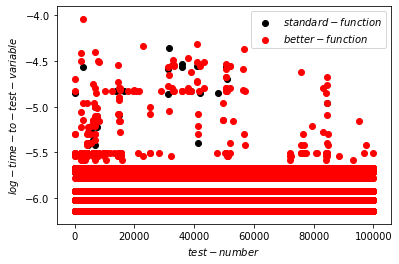

In [47]:
# Timing code skeleton
nmax = int(1e5) # This will take a second to run. 
nvals = np.arange(2,nmax+1)
nlen = nvals.size
timesstd = np.zeros(nlen)
timesbtr = np.zeros(nlen)

for jj in range(nlen):
    start = time()# add code
    trl_dvsn(nlen)# add code
    end = time()# add code 
    timesstd[jj] = end-start
    
    start = time()# add code
    bttr_trl_dvsn(nlen)# add code
    end = time()# add cpde 
    timesbtr[jj] = end-start
    
plt.scatter(nvals,np.ma.log10(timesstd), color='k', label = "$standard-function$")
plt.scatter(nvals,np.ma.log10(timesbtr), color='r', label = "$better-function$")
plt.xlabel("$test-number$")
plt.ylabel("$log-time-to-test-variable$")
plt.legend()
# add labels and all those wonderful things 

scatter plot description: It seems that we are able to compute more values at a greater speed  as we take let n get large in the better function. We also see the time to run the better function caps out faster than standard function.